<a href="https://colab.research.google.com/github/edmenciab733/clases/blob/main/regresion_lineal_ejemplo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import pandas as pd

Ejemplo de Regresión Lineal con Rudio Blanco

In [22]:
def fgenerador_y(x):
    np.random.seed(42) # para poder reproducirlo
    y = 0.2 * x + 1.5 + 0.2 * np.random.randn(x.shape[0])
    return y
x = np.arange(0, 20, 0.5) #rango de 0 a 20 con un salto de 0.5
y = fgenerador_y(x)
d = {'x': x, 'y': y}
df = pd.DataFrame(data=d)
df.head()

,x,y
0,0.0,1.599343
1,0.5,1.572347
2,1.0,1.829538
3,1.5,2.104606
4,2.0,1.853169


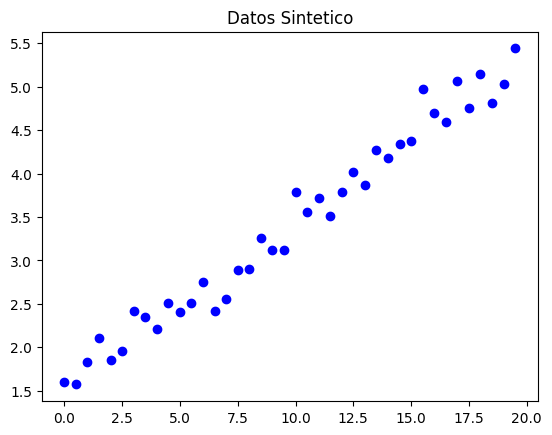

In [23]:
%matplotlib inline
plt.scatter(x,y,label='data', color='blue')
plt.title('Datos Sintetico');

# Modelos de Regresión Lineal

## La ecuación de la Recta
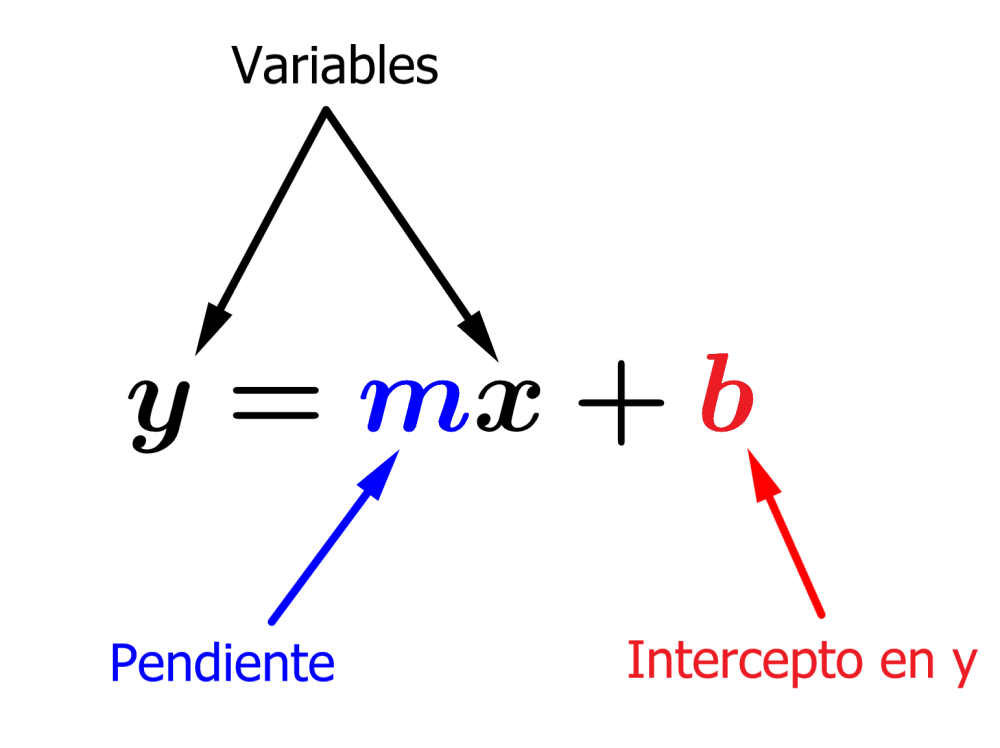

In [33]:
# Importamos la clase de Regresión Lineal de scikit-learn
from sklearn.linear_model import LinearRegression
regresion_lineal = LinearRegression() # creamos una instancia de LinearRegression
# instruimos a la regresión lineal que aprenda de los datos (x,y)
predict = regresion_lineal.fit(x.reshape(-1,1), y)
# vemos los parámetros que ha estimado la regresión lineal
print('w = ' + str(regresion_lineal.coef_) + ', b = ' + str(regresion_lineal.intercept_))

w = [0.19183522], b = 1.5358792525736689


In [44]:
prediccion = regresion_lineal.predict(x.reshape(-1,1))
df["prediccion"] = prediccion

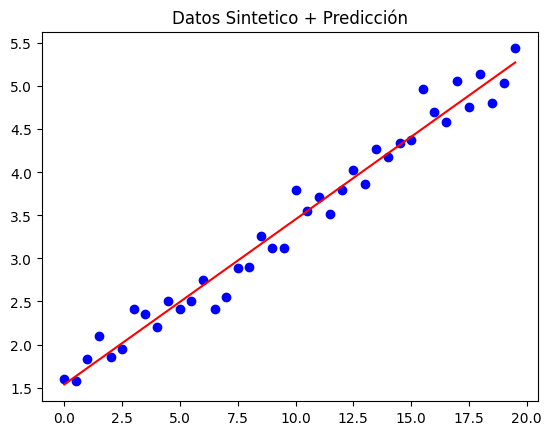

In [45]:
%matplotlib inline
plt.scatter(x,y,label='data', color='blue')
plt.plot(x.reshape(-1,1), prediccion,label='data', color='red')
plt.title('Datos Sintetico + Predicción');

In [144]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_true = df["y"], y_pred = df["prediccion"])
print('Error Cuadrático Medio (MSE) = ' + str(np.sqrt(mse)))

Error Cuadrático Medio (MSE) = 0.18216810952875095


## Regresión Lineal Multiple

Y = b + m1 X1 + m2 X2 + … + m(n) X(n)

Explicación del dataset:

 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 - CRIM     per capita crime rate by town
 - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS    proportion of non-retail business acres per town
 - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX      nitric oxides concentration (parts per 10 million)
 - RM       average number of rooms per dwelling
 - AGE      proportion of owner-occupied units built prior to 1940
 - DIS      weighted distances to five Boston employment centres
 - RAD      index of accessibility to radial highways
 - TAX      full-value property-tax rate per $10,000

 - PTRATIO  pupil - teacher ratio by town
 - B        proportion de gente negra 1000(Bk - 0.63)^2
 - LSTAT    porcentaje lower status of the population
 - MEDV     Median value of owner-occupied homes in $1000's

In [151]:
column_names_x = ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat' ]

In [99]:
data_url = "https://raw.githubusercontent.com/selva86/datasets/master/BostonHousing.csv"
raw_df = pd.read_csv(data_url, sep=",")
raw_df.shape

((506, 14), 14)

### Analisis de Datos

In [100]:
raw_df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [101]:
print(raw_df.describe())

             crim          zn       indus        chas         nox          rm  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              age         dis         rad         tax     ptratio           b  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

In [73]:
raw_df.shape

(506, 11)

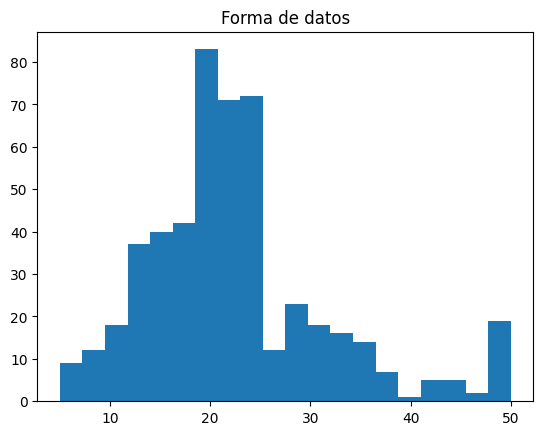

In [105]:
plt.hist(raw_df["medv"], bins=20)
plt.title('Forma de datos');

<Axes: >

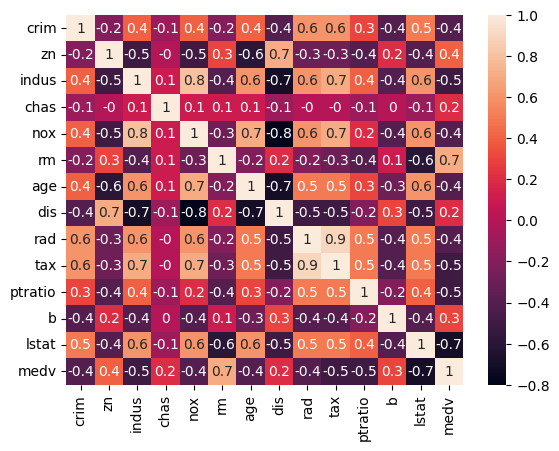

In [106]:
import seaborn as sns
correlation_matrix = raw_df.corr().round(1)
sns.heatmap(correlation_matrix, annot=True)

In [126]:
X = raw_df[column_names_x]
Y = raw_df["medv"]

In [127]:
X .head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


### Aplicación del modelo de Regresión Lineal

In [128]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [129]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [147]:
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))

In [153]:
print("El modelo en Entrenaniento")
print("--------------------------------------")
print('RMSE es {}'.format(rmse))
print("\n")

El modelo en Entrenaniento
--------------------------------------
RMSE es 4.568292042303193




### Evaluación

In [149]:
# model evaluation for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))

In [152]:
print("El modelo en Testing")

print('RMSE es {}'.format(rmse))

El modelo en Testing
RMSE es 4.568292042303193
